In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [90]:
df.describe()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,3.935824,3.201149,3.156130,4.434866,11.341954
std,1.239975,0.731727,0.834353,0.933401,1.031507,1.152575,6.210017,3.864796
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,17.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,18.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [112]:
df.corr().round(2)

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
age,1.00,0.05,-0.01,0.01,0.00,0.12,0.15,-0.13
traveltime,0.05,1.00,-0.08,-0.01,-0.01,0.05,-0.02,-0.10
studytime,-0.01,-0.08,1.00,0.01,-0.09,-0.07,-0.08,0.16
famrel,0.01,-0.01,0.01,1.00,0.14,0.08,-0.06,0.05
freetime,0.00,-0.01,-0.09,0.14,1.00,0.32,-0.03,-0.06
goout,0.12,0.05,-0.07,0.08,0.32,1.00,0.06,-0.10
absences,0.15,-0.02,-0.08,-0.06,-0.03,0.06,1.00,-0.05
G3,-0.13,-0.10,0.16,0.05,-0.06,-0.10,-0.05,1.00


In [110]:
df.corr()[df.corr() > 0.1]

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
age,1.000000,NaN,NaN,NaN,NaN,0.118510,0.153196,NaN
traveltime,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.161629
famrel,NaN,NaN,NaN,1.000000,0.136901,NaN,NaN,NaN
freetime,NaN,NaN,NaN,0.136901,1.000000,0.323556,NaN,NaN
goout,0.118510,NaN,NaN,NaN,0.323556,1.000000,NaN,NaN
absences,0.153196,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
G3,NaN,NaN,0.161629,NaN,NaN,NaN,NaN,1.000000


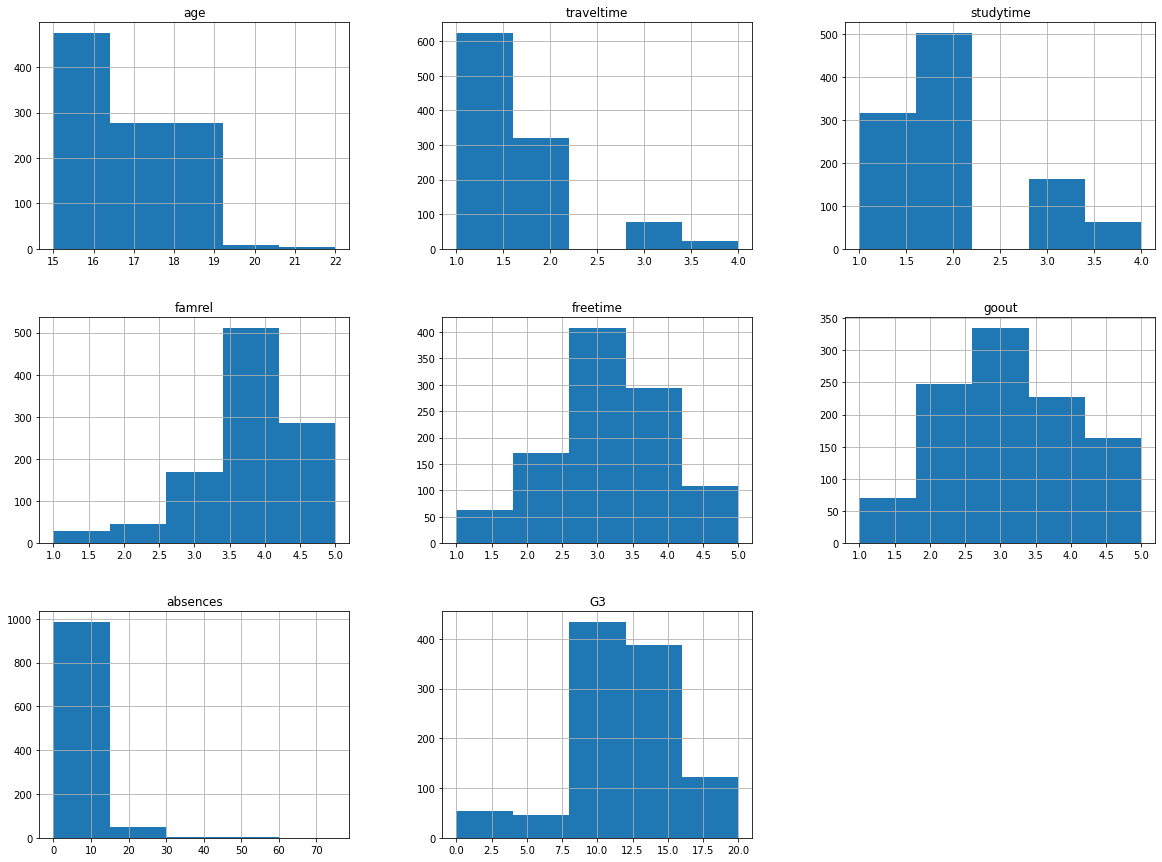

In [91]:
df.hist(bins=5, figsize=(20,15))
plt.show()

In [92]:
df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

In [93]:
df.G3.describe()

count    1044.000000
mean       11.341954
std         3.864796
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64

In [224]:
for i in range(len(df.sex)):
    if df.sex[i] == 'M':
        df.sex[i] = 0
    elif df.sex[i] == 'F':
        df.sex[i] = 1

for i in range(len(df.Pstatus)):
    if df.Pstatus[i] == 'A':
        df.Pstatus[i] = 0
    elif df.Pstatus[i] == 'T':
        df.Pstatus[i] = 1

for i in range(len(df.famsize)):
    if df.famsize[i] == 'GT3':
        df.famsize[i] = 0
    elif df.famsize[i] == 'LE3':
        df.famsize[i] = 1

for d in [i for i in df][6:12]:
    for i in range(len(df[d])):
        if df[d][i] == 'no':
            df[d][i] = 0
        elif df[d][i] == 'yes':
            df[d][i] = 1
            
df

C:\Users\Tiago\AppData\Local\Temp/ipykernel_3724/81311121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[i] = 1
C:\Users\Tiago\AppData\Local\Temp/ipykernel_3724/81311121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex[i] = 0
C:\Users\Tiago\AppData\Local\Temp/ipykernel_3724/81311121.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Pstatus[i] = 0
C:\Users\Tiago\AppData\Local\Temp/ipykernel_3724/81311121.py:11

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,1,18,0,0,2,2,1,0,0,0,0,0,4,3,4,6,6
1,1,17,0,1,1,2,0,1,0,0,1,0,5,3,3,4,6
2,1,15,1,1,1,2,1,0,1,0,1,0,4,3,2,10,10
3,1,15,0,1,1,3,0,1,1,1,1,1,3,2,2,2,15
4,1,16,0,1,1,2,0,1,1,0,0,0,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1,19,0,1,1,3,0,0,0,1,1,0,5,4,2,4,10
1040,1,18,1,1,1,2,0,1,0,0,1,0,4,3,4,4,16
1041,1,18,0,1,2,2,0,0,0,1,0,0,1,1,1,6,9
1042,0,17,1,1,2,1,0,0,0,0,1,0,2,4,5,6,10


In [288]:
# SEPARANDO O CONJUNTO DE TESTE E TREINO

import numpy as np

def split_train_test(data, test_ratio):
    suffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = suffled_indices[:test_set_size]
    train_indices = suffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.3)
print(len(train_set), "treino +" , len(test_set), "teste")

731 treino + 313 teste


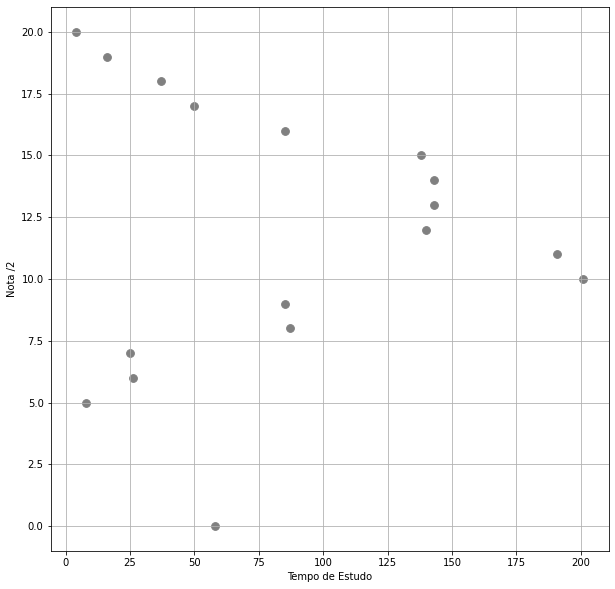

In [393]:
df_notas = train_set.groupby(['G3'], as_index=False).sum()

plt.figure(figsize=[10,10])
plt.scatter(df_notas['studytime'], df_notas['G3'], s=60, c="gray")
plt.plot(100, 10, c='black', lw=2)
plt.xlabel('Tempo de Estudo')
plt.ylabel('Nota /2')
plt.grid()
plt.show()

In [352]:
df_notas.describe().round(2)

,G3,age,traveltime,studytime,famrel,freetime,goout,absences
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00
mean,11.76,719.94,65.76,84.53,168.94,136.71,135.47,192.18
std,5.52,555.65,53.95,64.15,129.98,105.66,103.93,166.12
min,0.00,16.00,1.00,4.00,4.00,2.00,2.00,0.00
25%,8.00,247.00,22.00,26.00,64.00,44.00,47.00,68.00
50%,12.00,692.00,64.00,85.00,161.00,128.00,130.00,143.00
75%,16.00,1142.00,96.00,140.00,268.00,205.00,208.00,301.00
max,20.00,1855.00,187.00,201.00,436.00,350.00,342.00,527.00


In [394]:
def detecta_outlier(x, limite = 1):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

df_notas['out_nota'] = detecta_outlier(df_notas.G3)
df_notas = df_notas.loc[df_notas.out_nota == 0]
len(df_notas)

17

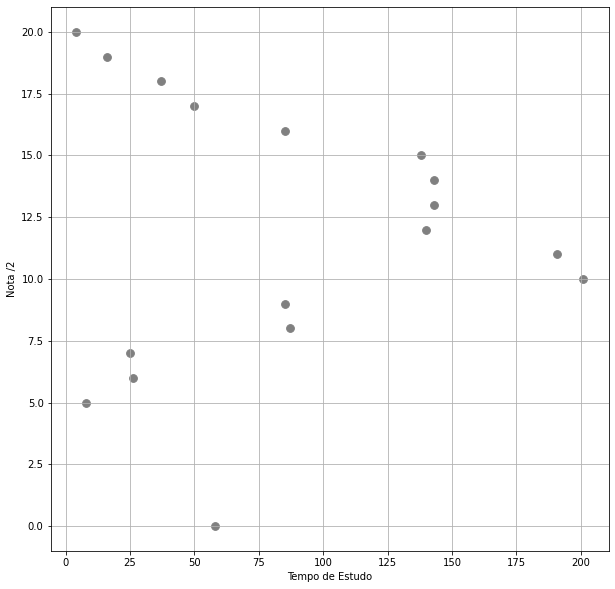

In [395]:
plt.figure(figsize=[10,10])
plt.scatter(df_notas['studytime'], df_notas['G3'], s=60, c="gray")
plt.plot(100, 10, c='black', lw=2)
plt.xlabel('Tempo de Estudo')
plt.ylabel('Nota /2')
plt.grid()
plt.show()

In [399]:
#Fazendo uma predição rápida agrupando as variável target

from sklearn.linear_model import LinearRegression

def take_ypred(x, y):
        
    lm = LinearRegression()

    def reshape(x, y):
        x = x.values.reshape(-1,1)
        y = y.values.reshape(-1,1)
        return x, y

    x, y = reshape(x, y)
    lm.fit(x, y)

    ypred = lm.predict(x)

    mse= np.mean((y - ypred)**2)
    rmse = np.sqrt(np.mean((y - ypred)**2))

    print("X: ", lm.intercept_, "Y: ", lm.coef_,"RMSE: ", rmse.round(2), "YPred: ", ypred)

    return ypred

ypred = take_ypred(df_notas.studytime, df_notas.G3)


X:  [11.88266247] Y:  [[-0.00139545]] RMSE:  5.35 YPred:  [[11.80172636]
 [11.87149887]
 [11.84638076]
 [11.84777621]
 [11.7612583 ]
 [11.7640492 ]
 [11.60217697]
 [11.61613148]
 [11.68729944]
 [11.68311309]
 [11.68311309]
 [11.69009034]
 [11.7640492 ]
 [11.81288996]
 [11.83103081]
 [11.86033527]
 [11.87708067]]


In [397]:
df_notas.G3[:10], ypred[:10]

(0     0
 1     5
 2     6
 3     7
 4     8
 5     9
 6    10
 7    11
 8    12
 9    13
 Name: G3, dtype: int64,
 array([[11.80172636],
        [11.87149887],
        [11.84638076],
        [11.84777621],
        [11.7612583 ],
        [11.7640492 ],
        [11.60217697],
        [11.61613148],
        [11.68729944],
        [11.68311309]]))

In [420]:
# isolando a variável target G3

notas = train_set.drop("G3", axis=1)
notas_labels = train_set['G3'].copy()

In [421]:
notas

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences
1028,1,18,1,1,1,2,0,0,0,1,1,0,5,4,3,1
118,0,17,0,1,3,2,0,1,0,1,1,0,5,2,4,20
283,1,18,0,1,2,2,1,0,0,1,1,0,5,4,4,4
392,0,21,0,1,1,1,0,0,0,0,0,0,5,5,3,3
329,1,17,0,1,2,3,0,1,1,0,1,1,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1,17,0,1,1,1,0,1,0,0,1,0,5,3,2,18
797,1,17,0,1,1,3,0,1,0,1,1,1,4,4,3,0
51,1,15,1,1,1,2,0,1,1,0,1,0,4,3,3,2
174,1,16,1,1,2,2,0,1,1,1,1,0,4,4,5,4


In [422]:
lin_reg = LinearRegression()
lin_reg.fit(notas, notas_labels)


LinearRegression()

In [423]:
from sklearn.metrics import mean_squared_error

notas_predict = lin_reg.predict(notas)

lin_mse = mean_squared_error(notas_labels, notas_predict)
lin_rmse = np.sqrt(lin_mse)

lin_rmse

3.5504548908557827

In [424]:
np.array(notas_labels[:10]), np.array([int(i) for i in notas_predict[:10]])

(array([14,  8, 10,  7, 14, 11, 16, 13,  7, 14], dtype=int64),
 array([12, 11,  9,  8, 11, 12, 14, 11, 11, 13]))

In [433]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(notas, notas_labels)

notas_predict = tree_reg.predict(notas)
tree_mse = mean_squared_error(notas_labels, notas_predict)
tree_rmse = np.sqrt(tree_mse)

tree_rmse

0.3138394685795649

In [427]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, notas, notas_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([5.02964187, 5.31990318, 4.89338385, 4.78439243, 5.01914144,
       5.21063191, 4.74161119, 4.47290167, 4.97837791, 5.71227949])

In [430]:
def display_scores(scores):
    print('Scores: ', scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [5.02964187 5.31990318 4.89338385 4.78439243 5.01914144 5.21063191
 4.74161119 4.47290167 4.97837791 5.71227949]
Mean:  5.016226494136717
Standard deviation:  0.32489637368575613


In [432]:
lin_socores = cross_val_score(lin_reg, notas, notas_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_socores)
display_scores(lin_rmse_scores)

Scores:  [4.08774787 4.12488143 3.81680862 2.77973441 3.68434254 3.87378981
 3.20766642 3.57972741 3.35906713 3.71672132]
Mean:  3.6230486961310873
Standard deviation:  0.39191980510885016


In [484]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(notas, notas_labels)

notas_predict = forest_reg.predict(notas)
forest_mse = mean_squared_error(notas_labels, notas_predict)
forest_rmse = np.sqrt(forest_mse)

forest_rmse

1.3626006578039669

In [482]:
forest_scores = cross_val_score(forest_reg, notas, notas_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [3.93132941 4.02825811 3.82639827 2.84888002 3.5057979  3.91154943
 3.16884721 3.50861019 3.31728086 3.85233589]
Mean:  3.589928727601991
Standard deviation:  0.36761293547883894


In [475]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error'
    )

grid_search.fit(notas, notas_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [477]:
grid_search.best_params_, grid_search.best_estimator_

({'max_features': 4, 'n_estimators': 30},
 RandomForestRegressor(max_features=4, n_estimators=30))

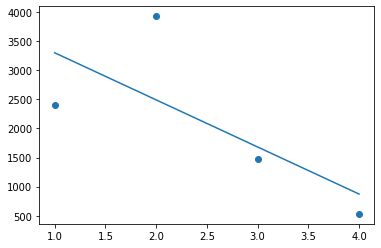

In [516]:
notas_plot = notas.copy()
notas_plot['G3'] = notas_labels

x = notas_plot['studytime']
y = notas_plot['G3']

def reshape(x, y):
    x = x.values.reshape(-1,1)
    y = y.values.reshape(-1,1)
    return x, y

x, y = reshape(x, y)

lin_reg.fit(x, y)
ypred = lin_reg.predict(x)

notas_plot = notas_plot.groupby(['studytime'], as_index=False).G3.sum()

plt.scatter(notas_plot['studytime'], notas_plot['G3'])
plt.plot(notas_plot['studytime'], ypred)

plt.show()

In [486]:
# Teste final

final_model = grid_search.best_estimator_

X_test = test_set.drop('G3', axis=1)
Y_test = test_set['G3'].copy()

final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

3.8204492840565196

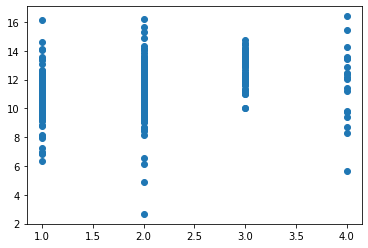

In [535]:
plt.scatter(X_test['studytime'], final_predictions)
plt.show()